<br>
<br>

# Z-Score Method for removing and detecting Outliers:

<br>
<br>

In [1]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [4]:

df = pd.read_csv("dataset/42_placement.csv")
np.random.seed(1)
df.sample(2)

,cgpa,placement_exam_marks,placed
507,6.77,75.0,1
818,5.52,62.0,0


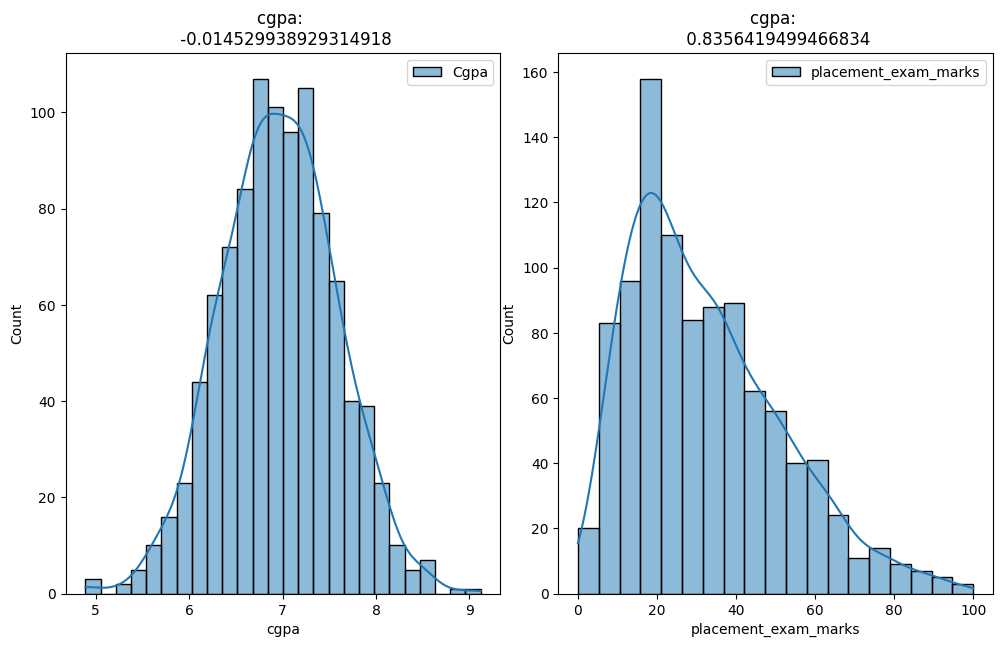

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.tight_layout()

sns.histplot(data=df,x="cgpa",ax=ax[0],label = "Cgpa",kde=True)
ax[0].set_title(f"cgpa: \n {df["cgpa"].skew()}")
ax[0].legend()

sns.histplot(data=df,x="placement_exam_marks",ax=ax[1],label = "placement_exam_marks",kde=True)
ax[1].set_title(f"cgpa: \n {df["placement_exam_marks"].skew()}")
ax[1].legend()